Importing required library

In [10]:
import numpy as np

import gym
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt


Linear Function Approximation

In [ ]:
# change name
class Linear_Fun_Approx:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.theta = np.random.randn(state_size * action_size)  # Initialize weights randomly

    # Generates feature vector for state and action 
    def features(self, state, action):
        
        features = np.zeros(self.state_size * self.action_size)
        start = action * self.state_size
        features[start:start + self.state_size] = state
        
        return features

    # Estimation Q-value 
    def predict(self, state, action):
        feature_vector = self.features(state, action)
        return np.dot(self.theta, feature_vector)

    # Weight updating part
    def update(self, state, action, td_error, alpha):
        
        feature_vector = self.features(state, action)
        self.theta += alpha * td_error * feature_vector

Action selection step


In [ ]:
def action_selection(q_function, state, epsilon, n_action):

    # Exploration step
    if np.random.random() < epsilon:
        final = np.random.choice(n_action) 
        return final 
    
    # Exploitation stpe
    else:
        q_values = [q_function.predict(state, a) for a in range(n_action)]
        final2 = np.argmax(q_values)  
        return final2

Scaling of feature

In [1]:
def scale_state(state, scaler):
    
    # Reshaping the state to (1,-1)
    state = np.array(state).reshape(1, -1)  
    scaled_state = scaler.transform(state)[0]
    return scaled_state  

Linear Function Approximation of SARSA

In [2]:
def sarsa_linear_fun_approx(env, episodes, alpha, gamma, epsilon):

    # Action and state space
    n_actions = env.action_space.n
    state_size = env.observation_space.shape[0]

    # Feature Initialization 
    scaler = StandardScaler()
    scaler.fit([env.observation_space.low, env.observation_space.high])

    # Initialization of the linear fun approximation.
    q_function = Linear_Fun_Approx(state_size, n_actions)

    rewards_per_episode = [] 

    for episode in range(episodes):
        state,_ = env.reset()  

        # scaling the state
        state = scale_state(state, scaler)  

        action = action_selection(q_function, state, epsilon, n_actions)
        done = False
        total_reward = 0  

        while not done:
            next_state, reward, done, _, _ = env.step(action)
            next_state = scale_state(next_state, scaler)

            next_action = action_selection(q_function, next_state, epsilon, n_actions)

            # Prediction of Q-values for the current, next state
            q_current = q_function.predict(state, action)
            q_next = q_function.predict(next_state, next_action)

            # Computing TD error
            td_error = reward + gamma * q_next - q_current

            # Update the weights using the TD error
            q_function.update(state, action, td_error, alpha)

            state, action = next_state, next_action
            total_reward += reward  # Accumulate the reward for this episode

        rewards_per_episode.append(total_reward)  # Store the reward for this episode

        
        if episode % 100 == 0:
            print(f"Episode {episode}/{episodes} complete.")

    return q_function, rewards_per_episode


Cartpole Environment

In [ ]:
env = gym.make("CartPole-v1")  

Hyperparameter

In [ ]:
# Episodes:
episodes = 1000

# Learning Rate:
alpha = 0.1  

# Discount Factor:
gamma = 0.99  

# Exploration Rate:
epsilon = 0.2  

Training the linear functionn approximation with SARSA

In [ ]:
q_function, rewards_per_episode = sarsa_linear_fun_approx(env, episodes, alpha, gamma, epsilon)

Testing the learned policy

In [5]:
# Getting state
state, _ = env.reset()  

# Scaling
state = scale_state(state, StandardScaler().fit([env.observation_space.low, env.observation_space.high]))  
done = False
total_reward = 0
while not done:

    action = action_selection(q_function, state, 0, env.action_space.n)  
    next_state, reward, done, _, _ = env.step(action)
    next_state = scale_state(next_state, StandardScaler().fit([env.observation_space.low, env.observation_space.high]))
    total_reward += reward
    state = next_state
env.close()

print(f"Total reward after training: {total_reward}")


Episode 0/1000 complete.
Episode 100/1000 complete.
Episode 200/1000 complete.
Episode 300/1000 complete.
Episode 400/1000 complete.
Episode 500/1000 complete.
Episode 600/1000 complete.
Episode 700/1000 complete.
Episode 800/1000 complete.
Episode 900/1000 complete.
Total reward after training: 52.0


Plot of avegage return per episode

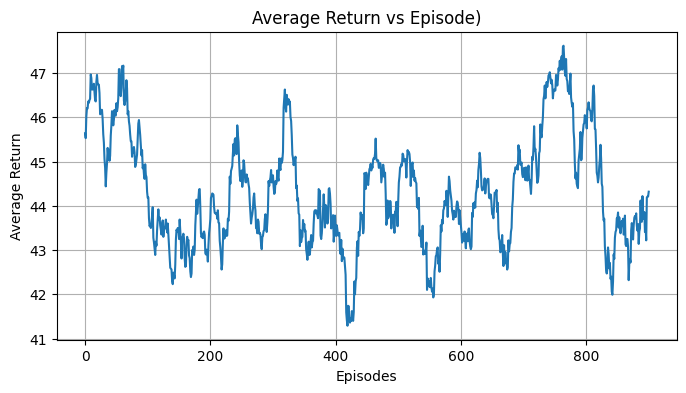

In [6]:
def avg_return_plot(rewards_per_episode, w_size=100):
    
    avg_return = np.convolve(rewards_per_episode, np.ones(w_size) / w_size, mode='valid')

    plt.figure(figsize=(8, 4))
    plt.plot(avg_return)
    plt.xlabel('Episodes')
    plt.ylabel('Average Return')
    plt.title(f'Average Return vs Episode)')
    plt.grid(True)
    plt.show()

# Final  Plot
avg_return_plot(rewards_per_episode)
